In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv(r"Data\Sliced_data\covid_data.csv")#, index_col=['date'], parse_dates=['date'])

data.head()

,location,date,population,new_cases,new_deaths,rollingCases,total_deaths,caseRate,deathRate
0,Afghanistan,2020-02-24,39835428.0,5.0,NaN,5.0,NaN,0.000013,NaN
1,Afghanistan,2020-02-25,39835428.0,0.0,NaN,5.0,NaN,0.000013,NaN
2,Afghanistan,2020-02-26,39835428.0,0.0,NaN,5.0,NaN,0.000013,NaN
3,Afghanistan,2020-02-27,39835428.0,0.0,NaN,5.0,NaN,0.000013,NaN
4,Afghanistan,2020-02-28,39835428.0,0.0,NaN,5.0,NaN,0.000013,NaN


In [19]:
continents = ['Africa', 'Asia', 'Europe', 'NorthAmerica', 'SouthAmerica', 'Oceania']
cont_label = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

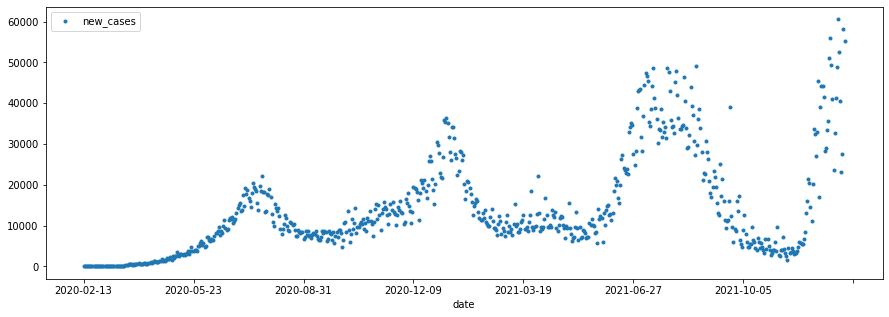

In [4]:
df1 = data.set_index('location')

_ = df1.loc['Africa'].plot(x='date', y='new_cases', style='.', figsize=(15,5), title='')
fig = _.get_figure()

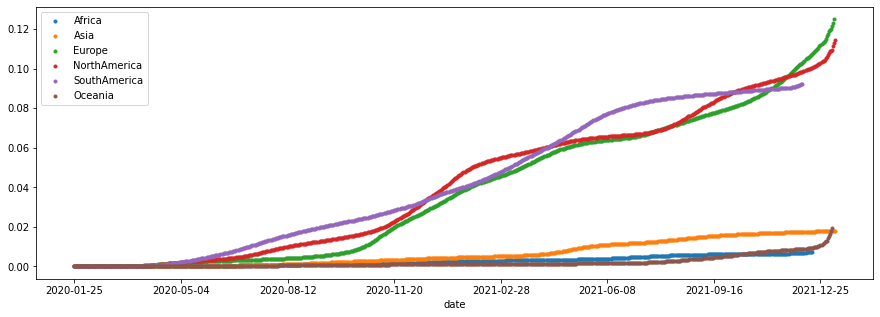

In [9]:
# Add a new column to the dataframe and plot multiple series on the same canvas

# Cases per capita per continent
data["cases_rate"] = data['rollingCases'] / data['population']

df1 = data.set_index('location')

# Cases rate by continent
for i, continent in enumerate(continents):
    if i == 0:
        ax = df1.loc[continent].plot(x = 'date', y = 'cases_rate', style = '.', figsize = (15,5), label = continent, title = '')
    else:
        df1.loc[continent].plot(x = 'date', y = 'cases_rate', style = '.', figsize = (15,5), label = continent, ax=ax)

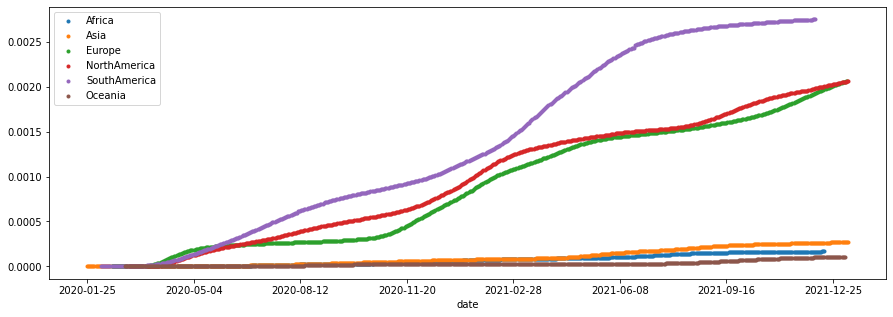

In [10]:
# Deaths per capita per continent

data["death_rate"] = data['total_deaths'] / data['population']

df1 = data.set_index('location')

# Cases rate by continent
for i, continent in enumerate(continents):
    if i == 0:
        ax = df1.loc[continent].plot(x = 'date', y = 'death_rate', style = '.', figsize = (15,5), label = continent, title = '')
    else:
        df1.loc[continent].plot(x = 'date', y = 'death_rate', style = '.', figsize = (15,5), label = continent, ax=ax)

(0.0, 0.11)

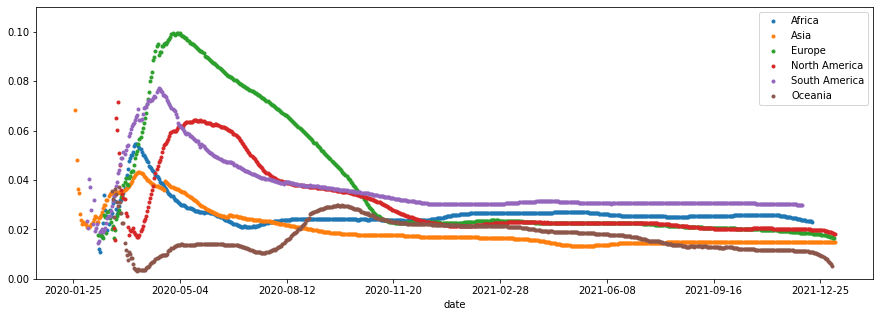

In [23]:
# Deaths / Cases by continent

data["deathCaseRatio"] = data['total_deaths'] / data['rollingCases']  # Add new column to dataframe
df1 = data.set_index('location')

for i, continent in enumerate(continents):
    if i == 0:
        ax = df1.loc[continent].plot(x = 'date', y = 'deathCaseRatio', style = '.', figsize = (15,5), label = cont_label[i]) 
    else:
        df1.loc[continent].plot(x = 'date', y = 'deathCaseRatio', style = '.', figsize = (15,5), label = cont_label[i], ax=ax) 

# Adjust the y-axis range        
ax.set_ylim(0, 0.11)